Package Installation

In [35]:
!pip install panda
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install colorama

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')


Loading the dataset 

In [4]:
xls = pd.ExcelFile('HospitalDatabase.xlsx')
df_ED = pd.read_excel(xls, 'EDVisits')
df_PA = pd.read_excel(xls, 'Patients')
df_AmbV = pd.read_excel(xls,'AmbulatoryVisits')
df_ReAd = pd.read_excel(xls, 'ReAdmissionRegistry')
df_Dis = pd.read_excel(xls, 'Discharges')
df_Pro = pd.read_excel(xls, 'Providers')
df_EDU = pd.read_excel(xls, 'EDUnique')


61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [5]:

np.arange(1,31).reshape(6,5)[2:4,:2]





array([[11, 12],
       [16, 17]])

    62.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the        value.

In [6]:

df1 = pd.read_excel(xls, 'EDVisits', usecols = ['Acuity','EDDisposition'])
df1.groupby(['Acuity','EDDisposition']).size()

Acuity  EDDisposition
1       Admitted          32
        Discharged       558
2       Admitted         116
        Discharged        66
3       Admitted          81
4       Admitted         107
        Discharged        30
5       Admitted         179
        Discharged        30
dtype: int64

    63.List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [21]:
from datetime import datetime
from datetime import date


#Filter male patients
male_patients = df_PA.query("Gender == 'Male'")

# filter ambulatory by Surgery
Surgical_patients = pd.merge(df_AmbV,df_Pro,on ='ProviderID').query("ProviderSpecialty=='Surgery'")



#merge tables of male patients and date filtered surgical patients

Male_surgical_patients = pd.merge(male_patients,Surgical_patients, left_on ='PatientID' ,right_on = 'PatientMRN' )


#Create age field in Years - Age calculated on the basis of Visit date - This one results in 0 patients

#Male_surgical_patients ['Age'] = (Male_surgical_patients ['DateofVisit'] - Male_surgical_patients ['DateOfBirth'])/np.timedelta64(1, 'Y')


#Create age field in Years - Age calculated on the basis of today - This one results in 8 patients

Male_surgical_patients ['Age'] = (datetime.now() - Male_surgical_patients ['DateOfBirth'])/np.timedelta64(1, 'Y')


# filter by visit date 273 patients
start_date = '01/01/2019'
end_date ='03/31/2019'

Male_surgical_patients.query("DateofVisit >= @start_date & DateofVisit <= @end_date")[['Age','DateofVisit']]


#filter by Age

Male_surgical_patients.query("Age > 60")








,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,VisitID,PatientMRN,ProviderID,...,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Age
2,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish,12,15,12,...,12,New,133.0,84.997205,62.342676,Completed,Sarah Ab,Surgery,1998-08-18 05:22:40.762,61.399014
5,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,16,19,16,...,4,New,131.0,64.484534,72.506395,Completed,Perry Pardon,Surgery,2001-02-13 11:49:17.862,63.022226
20,533,Chaddy,Alekseev,1962-09-25 00:19:23.874,Male,Black/African-American,English,596,533,13,...,12,Physical,143.0,95.303929,63.937952,Completed,Abigail Marriot,Surgery,1998-11-08 12:25:45.705,60.548263
21,536,Derrek,Alekseev,1962-09-21 03:50:55.567,Male,Black/African-American,English,597,536,14,...,1,Physical,137.0,84.743808,82.525978,Completed,Dave Yu,Surgery,1999-06-26 16:18:57.436,60.558812
24,581,Constanta,Edgin,1960-06-06 08:19:25.534,Male,Black/African-American,English,380,581,11,...,7,Telemedicine,179.0,113.061708,84.869647,Completed,Kim Kimberly,Surgery,1998-05-10 14:47:29.468,62.849930
46,802,Berta,Loxly,1961-05-19 21:00:01.885,Male,White,English,164,802,12,...,8,Follow Up,NaN,NaN,NaN,Completed,Sarah Ab,Surgery,1998-08-18 05:22:40.762,61.898430
56,813,Kellsie,Tuttle,1963-01-21 16:48:47.209,Male,White,English,661,813,13,...,5,Physical,177.0,135.106109,50.634576,Completed,Abigail Marriot,Surgery,1998-11-08 12:25:45.705,60.223309
57,876,Gerty,Gheorghie,1962-03-08 09:17:10.706,Male,White,English,724,876,14,...,7,Telemedicine,142.0,86.553402,60.834514,No Show,Dave Yu,Surgery,1999-06-26 16:18:57.436,61.097560


    64.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [8]:
ProviderName =  pd.DataFrame([])

new = df_Pro["ProviderName"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
ProviderName["First Name"]= new[0]
 
# making separate last name column from new data frame
ProviderName["Last Name"]= new[1]

ProviderName  

,First Name,Last Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


    65.Plot a graph showing the count of patients for the reason visited the hospital.

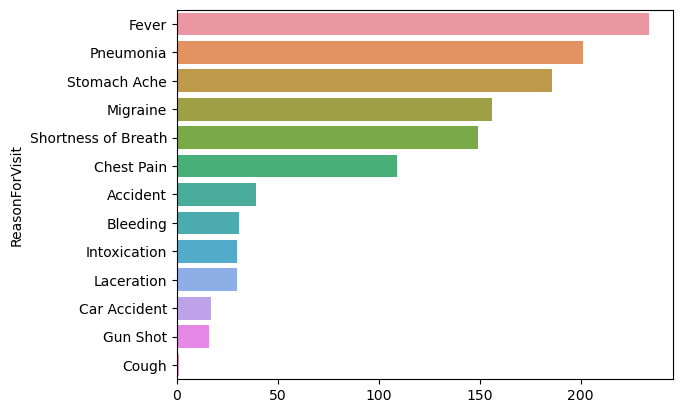

In [43]:
graph = df_ED.groupby(['ReasonForVisit']).size().sort_values(ascending=False)
sns.barplot(y = graph.index, x = graph.values)
plt.show()

    66. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [73]:

pd.merge(df_PA,df_EDU,on = 'PatientID',how ='inner')[['FirstName', 'LastName', 'DateOfBirth','ReasonForVisit']].query("ReasonForVisit == 'Migraine'")






,FirstName,LastName,DateOfBirth,ReasonForVisit
1,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


    67. Make a pivot table by the no. of patients from the admission date till discharge date.

In [136]:
#NOT THE FINAL ANSWER

p_table = pd.pivot_table(df_Dis, index= ['AdmissionDate'], columns = ['DischargeDate'], values=['PatientID'], aggfunc = 'count' )

p_table

PatientID                          \
DischargeDate 2018-01-04 19:59:31.391 2018-01-04 21:28:51.898   
AdmissionDate                                                   
2018-01-01                        1.0                     1.0   
2018-01-02                        NaN                     NaN   
2018-01-03                        NaN                     NaN   
2018-01-04                        NaN                     NaN   
2018-01-05                        NaN                     NaN   
2018-01-06                        NaN                     NaN   
2018-01-07                        NaN                     NaN   
2018-01-08                        NaN                     NaN   
2018-01-09                        NaN                     NaN   
2018-01-10                        NaN                     NaN   
2018-01-11                        NaN                     NaN   
2018-01-12                        NaN                     NaN   
2018-01-13                        NaN                     NaN   
2018-01-14                        NaN                     NaN   
2018-01-15                        NaN                     NaN   
2018-01-16                        NaN                     NaN   
2018-01-17                        NaN                     NaN   
2018-01-18                        NaN                     NaN   
2018-01-19                        NaN                     NaN   
2018-01-20                        NaN                     NaN   
2018-01-21                        NaN                     NaN   
2018-01-22                        NaN                     NaN   
2018-01-23                        NaN                     NaN   
2018-01-24                        NaN                     NaN   
2018-01-25                        NaN                     NaN   
2018-01-26                        NaN                     NaN   
2018-01-27                        NaN                     NaN   
2018-01-28                        NaN                     NaN   
2018-01-29                        NaN                     NaN   
2018-01-30                        NaN                     NaN   
2018-01-31                        NaN                     NaN   
2018-02-01                        NaN                     NaN   
2018-02-02                        NaN                     NaN   
2018-02-03                        NaN                     NaN   
2018-02-04                        NaN                     NaN   
2018-02-05                        NaN                     NaN   
2018-02-06                        NaN                     NaN   
2018-02-07                        NaN                     NaN   
2018-02-08                        NaN                     NaN   
2018-02-09                        NaN                     NaN   
2018-02-10                        NaN                     NaN   
2018-02-11                        NaN                     NaN   
2018-02-12                        NaN                     NaN   
2018-02-13                        NaN                     NaN   
2018-02-14                        NaN                     NaN   
2018-02-15                        NaN                     NaN   
2018-02-16                        NaN                     NaN   
2018-02-17                        NaN                     NaN   
2018-02-18                        NaN                     NaN   
2018-02-19                        NaN                     NaN   
2018-02-20                        NaN                     NaN   
2018-02-21                        NaN                     NaN   
2018-02-22                        NaN                     NaN   

                                                               \
DischargeDate 2018-01-04 22:28:23.672 2018-01-05 02:40:20.756   
AdmissionDate                                                   
2018-01-01                        1.0                     NaN   
2018-01-02                        NaN                     1.0   
2018-01-03                        NaN                     NaN 

68. Calculate average LOS.

In [17]:
df_ReAd['ExpectedLOS'].mean()

8.824589159156147

69. Number of patients on 'Transfer' based on primary diagnosis.

In [40]:
df2 = df_ReAd.query("DischargeDisposition == 'Transfer'")

df2.groupby(['PrimaryDiagnosis']).size()

PrimaryDiagnosis
Afib                1
Diabetes            7
Flu                 2
Heart Failure       9
Knee Replacement    1
Laceration          1
Pain                1
Pneumonia           8
Stroke              9
dtype: int64

70. Violin plot for Level of Acuity by Visit Reason

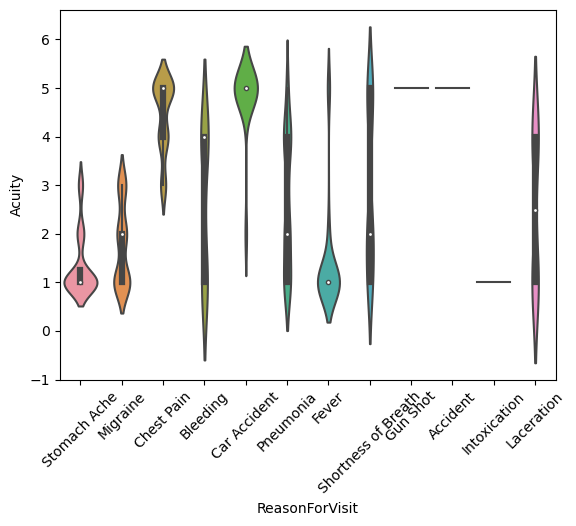

In [53]:
sns.violinplot(data=df_EDU,x='ReasonForVisit',y='Acuity')
plt.xticks(rotation=45)
plt.show()

71. Find the count of White Spanish Male.

In [66]:
len(df_PA.query("Gender == 'Male'& Language =='Spanish' & Race == 'White'" ))


15

72. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [59]:
LOS = pd.merge(df_ReAd.groupby(['PrimaryDiagnosis'])['ExpectedLOS'].min(),df_ReAd.groupby(['PrimaryDiagnosis'])['ExpectedLOS'].max(), right_index=True, left_index=True)
LOS ['difference'] = d['ExpectedLOS_y'] - d['ExpectedLOS_x']

print('The biggest difference between maximum and minumum LOS  is ' + str(round(LOS['difference'] .max(),2)) + ' which is for the primary diagnosis ' + str(LOS['difference'] .idxmax()))






The biggest difference between maximum and minumum LOS  is 14.83 which is for the primary diagnosis Pneumonia


73. Which patient id has most entries in readmission registry.

In [10]:
df_ReAd['count']= df_ReAd.groupby(['PatientID']).size()
df_ReAd['count'].idxmax()




23

74. "Create a figure object called fig using plt.figure() **
 ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
 ** Plot (x,y) on that axes and set the labels.
 Note : You can plot on any x,y set of values."

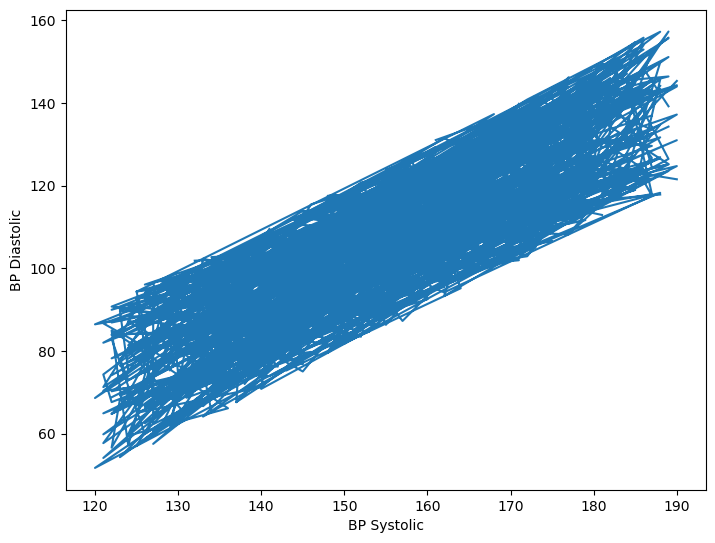

In [26]:
fig =plt.figure()
new_axis = fig.add_axes([0, 0, 1, 1])
x = df_AmbV['BloodPressureSystolic']
y = df_AmbV['BloodPressureDiastolic']
plt.plot(x,y)

plt.xlabel("BP Systolic")
plt.ylabel("BP Diastolic")

plt.show()


75. "Using numpy functions, multiply the following arrays
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)"

In [80]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
c = np.multiply(a,b.reshape(2,3))
c

array([[ 0,  1,  4],
       [ 9, 16, 25]])

    76.Mortality O:E

In [87]:
df_Dis.loc[ df_Dis["DischargeDisposition"] == 'Expired', "Observed Mortality"] = 1
df_Dis.loc[ df_Dis["DischargeDisposition"] != 'Expired', "Observed Mortality"] = 0
df_Dis["Mortality O:E"] = df_Dis["Observed Mortality"]/df_Dis["ExpectedMortality"]
print("The average Mortality O:E for all patients is " + str(round(df_Dis["Mortality O:E"].mean(),2)))

The average Mortality O:E for all patients is 1.69


    77. Plot a graph to count the patients based on discharge disposition.

TypeError: object of type 'int' has no len()

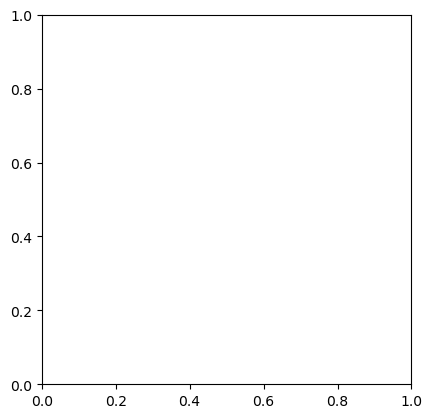

In [121]:
#18.Creating Pie Charts - NOT COMPLETE

import collections

df3 = df_Dis[['DischargeDisposition']]

df4 = pd.DataFrame(df3).to_numpy()

arr1 = list(np.unique(df4, return_counts=True))
type(arr1)
arr1[1]
# for element in df4:
#     myexplode.append(df4.count(element))

myexplode=[0,0,0.3]
y = arr1[1]

mylabels = len(y)




mycolors=["red","black","green"]
plt.pie(y,explode='none',labels=mylabels,colors=mycolors,shadow= True)
plt.legend(title="Discharge Disposition")
plt.show()

    78. Display total count of patients service wise based on gender.

In [126]:
df5 = pd.merge(df_PA,df_ReAd, on ='PatientID')
df5.groupby(['Gender','Service']).size()


Gender  Service         
Female  Cardiology           41
        General Medicine    114
        Hospitalist          35
        ICU                  65
        Neurology            34
        Orthopeadics         22
Male    Cardiology           54
        General Medicine    149
        Hospitalist          66
        ICU                  86
        Neurology            31
        Orthopeadics         23
dtype: int64

79. Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [134]:
pd.pivot_table(df_Dis, index= ['Service'], columns = ['PrimaryDiagnosis'], values=['ExpectedLOS'] )




ExpectedLOS                                            \
PrimaryDiagnosis         AMI       Afib Broken Leg  Diabetes     Fever   
Service                                                                  
Cardiology         12.414202  13.162920   3.911826       NaN       NaN   
General Medicine         NaN        NaN   3.368132  5.665298  6.803796   
Hospitalist        13.828290        NaN   7.125069  7.874359  8.865651   
ICU                12.503213   9.651522        NaN       NaN  3.860693   
Neurology          10.482847        NaN        NaN       NaN       NaN   
Orthopeadics             NaN        NaN        NaN       NaN       NaN   

                                                                    \
PrimaryDiagnosis       Flu Heart Failure Hip Fracture Hypertension   
Service                                                              
Cardiology        3.970428     13.014044          NaN          NaN   
General Medicine  6.141753           NaN          NaN     5.369365   
Hospitalist       7.033979           NaN          NaN     7.864913   
ICU               4.953871     12.784620          NaN     5.092533   
Neurology         6.700593     12.737565          NaN     4.276454   
Orthopeadics           NaN           NaN     3.474971          NaN   

                                                                        \
PrimaryDiagnosis Kidney Failure Knee Replacement Laceration   Migraine   
Service                                                                  
Cardiology             6.580273              NaN        NaN        NaN   
General Medicine       5.943163              NaN   6.771154        NaN   
Hospitalist            7.850346         2.255705   7.069360        NaN   
ICU                    9.045995              NaN  10.101443        NaN   
Neurology                   NaN              NaN        NaN  12.202213   
Orthopeadics                NaN         3.702839        NaN        NaN   

                                                                      
PrimaryDiagnosis       Pain  Pneumonia Spinal Cord Injury     Stroke  
Service                                                               
Cardiology              NaN        NaN                NaN        NaN  
General Medicine        NaN   6.140270                NaN   7.173333  
Hospitalist             NaN   8.146240                NaN  15.349671  
ICU                     NaN  13.523626           15.27654  13.297978  
Neurology         11.441453   7.527330                NaN  12.745608  
Orthopeadics            NaN        NaN                NaN        NaN

80.Display the data for all 'White Female' patients above the age of 50.

In [131]:
#Merge all data

df6 = pd.merge(df_ED,df_PA, on ='PatientID')
df7 = pd.merge(df6,df_AmbV, left_on ='PatientID' ,right_on = 'PatientMRN')
df8 = pd.merge(df7,df_ReAd, on ='PatientID')
df9 = pd.merge(df8,df_Dis, on ='PatientID')
df10 = pd.merge(df9,df_Pro, on ='ProviderID')
df11 = pd.merge(df10,df_EDU, on ='PatientID')


# Create an Age column
df11 ['Age'] = round((df11 ['DateofVisit'] - df11['DateOfBirth'])/np.timedelta64(1, 'Y'),2)



# Filter based on white female over 50 years
df11.query("Race=='White' & Gender == 'Female' & Age >50")

,EDVisitID_x,PatientID,VisitDate_x,EDDischargeTime_x,Acuity_x,ReasonForVisit_x,EDDisposition_x,FirstName,LastName,DateOfBirth,...,ProviderName,ProviderSpecialty,ProviderDateOnStaff,EDVisitID_y,VisitDate_y,EDDischargeTime_y,Acuity_y,ReasonForVisit_y,EDDisposition_y,Age
2,156,65,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,Admitted,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Black,Pediatrics,1997-02-20 08:01:10.211,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.30
3,67,65,2020-01-01 17:53:30.192,2020-01-02 05:01:23.052,1,Stomach Ache,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Black,Pediatrics,1997-02-20 08:01:10.211,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.30
4,445,65,2020-01-06 10:34:45.949,2020-01-07 01:56:25.773,4,Laceration,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Black,Pediatrics,1997-02-20 08:01:10.211,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.30
5,156,65,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,Admitted,Harry,Florie,1968-12-20 00:34:28.879,...,Luke Long,Cardiology,2006-04-28 00:16:36.762,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.20
6,67,65,2020-01-01 17:53:30.192,2020-01-02 05:01:23.052,1,Stomach Ache,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Luke Long,Cardiology,2006-04-28 00:16:36.762,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,169,78,2020-01-02 21:35:44.622,2020-01-03 01:33:16.101,1,Fever,Discharged,Annaliese,Walkden,1964-01-17 04:34:44.746,...,Trent Tye,PrimaryCare,2013-01-12 15:32:21.137,81,2020-01-01 21:36:25.663,2020-01-01 22:17:00.528,4,Shortness of Breath,admitted,55.16
750,81,78,2020-01-01 21:36:25.663,2020-01-01 22:17:00.528,4,Shortness of Breath,Admitted,Annaliese,Walkden,1964-01-17 04:34:44.746,...,Dwight Scott,PrimaryCare,2009-04-18 19:15:44.587,81,2020-01-01 21:36:25.663,2020-01-01 22:17:00.528,4,Shortness of Breath,admitted,55.04
751,169,78,2020-01-02 21:35:44.622,2020-01-03 01:33:16.101,1,Fever,Discharged,Annaliese,Walkden,1964-01-17 04:34:44.746,...,Dwight Scott,PrimaryCare,2009-04-18 19:15:44.587,81,2020-01-01 21:36:25.663,2020-01-01 22:17:00.528,4,Shortness of Breath,admitted,55.04
752,81,78,2020-01-01 21:36:25.663,2020-01-01 22:17:00.528,4,Shortness of Breath,Admitted,Annaliese,Walkden,1964-01-17 04:34:44.746,...,Joesph Walter,Cardiology,2005-02-04 11:40:44.121,81,2020-01-01 21:36:25.663,2020-01-01 22:17:00.528,4,Shortness of Breath,admitted,55.26
